In [15]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit

from matplotlib.pyplot import *
%matplotlib inline

In [16]:
#First Load the Data File
#View the data
file_location = "/Users/jonathanjramirez/Downloads/nyc.csv"
nyc_restaurant = pd.read_csv(file_location , sep=',', na_values="99")
nyc_restaurant.head()

,Case,Restaurant,Price,Food,Decor,Service,East
0,1.0,Daniella Ristorante,43,22,18,20,0
1,2.0,Tello's Ristorante,32,20,19,19,0
2,3.0,Biricchino,34,21,13,18,0
3,4.0,Bottino,41,20,20,17,0
4,5.0,Da Umberto,54,24,19,21,0


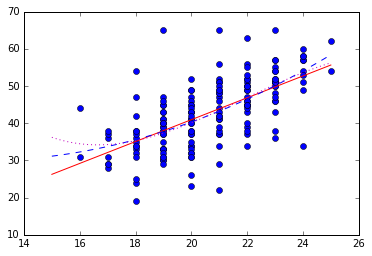

In [17]:
#Plot variables to view their relationship

plot(nyc_restaurant['Food'],nyc_restaurant['Price'],'o')

p1 = np.polyfit(nyc_restaurant['Food'],nyc_restaurant['Price'],1)
p2 = np.polyfit(nyc_restaurant['Food'],nyc_restaurant['Price'],2)
p3 = np.polyfit(nyc_restaurant['Food'],nyc_restaurant['Price'],3)


xp = np.linspace(15,25,40)
plot(xp,np.polyval(p1,xp), 'r-')
plot(xp,np.polyval(p2,xp),'b--')
plot(xp,np.polyval(p3,xp),'m:')

In [18]:
model = ols("Price ~ Food + Decor + Service + East", nyc_restaurant).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     68.76
Date:                Thu, 22 Sep 2016   Prob (F-statistic):           5.35e-34
Time:                        00:06:13   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1069.
Df Residuals:                     163   BIC:                             1084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -24.0238      4.708     -5.102      0.0

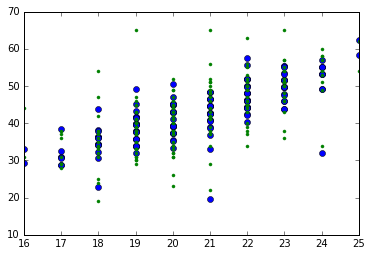

In [26]:
pred_y = model.predict()
plot(nyc_restaurant['Food'],pred_y,'o')
plot(nyc_restaurant['Food'],nyc_restaurant['Price'],'.')